# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleksandrageorgievska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleksandrageorgievska/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aleksandrageorgievska/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape

df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

0

In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def make_lowercase(test_string):
    return test_string.lower()

make_lowercase(test_string)

'this is a sentence with lots of caps.'

In [7]:
# 2. Make a function that removes all punctuation. 


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punc(test_string):
    test_string = re.sub(r'[^\w\s]', '', test_string)
    return test_string

remove_punc(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [8]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(test_string):
    # Break the sentence down into a list of words
    words = word_tokenize(test_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords. Stopwords was imported from nltk.corpus
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

# Break words into their stem words

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word) #from nltk.stem import PorterStemmer
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 


stem_words(test_string)

'I play and start play with player and we all love to play with play'

In [10]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def text_processing_pipeline(a_string):
    a_string = make_lowercase(a_string)
    a_string = remove_punc(a_string)
    a_string = remove_stopwords(a_string)
    a_string = stem_words(a_string)
    return a_string

text_processing_pipeline(test_string)

'play start play player love play play'

In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_processing_pipeline)

print("ORIGINAL TEXT:", df['message'][0])
print("CLEANDED TEXT:", df['message_clean'][0])

ORIGINAL TEXT: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANDED TEXT: lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumper separ

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [12]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

# Split your data into Training and Testing data. 

In [13]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [14]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

#from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# 3. Fit your vectorizer using your X data
# This makes your vocab matrix
vectorizer.fit(X_train)

# 4. Transform your X data using your fitted vectorizer. 
# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# 5. Print the shape of your X.  How many features (aka columns) do you have? -> 105630 columns! 
print(X_train.shape, type(X))

(9051, 105630) <class 'numpy.ndarray'>


In [15]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

105630 105630


,feature,idf
52815,knowladg,9.417594
62336,mbq72pl5u7tl2pqs7r_35iiquak1doqxqiqyi,9.417594
62354,mbrqmdq9i76igi086kopgg4x6zj5aoke2wplm,9.417594
62353,mbrllfnah,9.417594
62352,mbrian,9.417594
...,...,...
21037,articl,1.822709
102893,write,1.616816
76741,organ,1.038399
54897,line,1.003098


In [16]:
type(X_train[0])

scipy.sparse.csr.csr_matrix

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [17]:
# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter tuning using GridSearch
# Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.
# Initalize your GridSearchCV with a MultinomialNB, your param_grid, and what you are optimizing for. 
# Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
# Fit your GridSearchCV with your training data.
# Print the parameters of your best model.
# Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores.


# params = {'alpha': [.05, .15, .25, .45, .65],
#          'fit_prior': ['True', 'False'],
#          'class_prior': ["None"]
#          }

# grid_search_cv =  GridSearchCV(
#     estimator = MultinomialNB(),
#     param_grid = params, 
#     scoring = 'f1'
#     )

# -THIS DID NOT WORK

In [ ]:
# grid_search_cv.fit(X_train, y_train) -THIS DID NOT WORK

In [ ]:
#pip install pycaret -ALREADY INSTALLED

In [ ]:
#pip install --pre pycaret -ALREADY INSTALLED

## Trying Pycaret compare_models function to determine best model/parameters  
#### from https://pycaret.gitbook.io/docs/get-started/functions/train
using the cleaned dataframe first with the text preprocessing 

In [18]:
from pycaret.datasets import get_data 

In [24]:
df_clean = df.drop(columns = ['message'])

In [26]:
df_clean.head()

,id,topic,topic_category,message_clean
0,0,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


In [27]:
from pycaret.classification import * #had to use $ brew install libomp to get this to import w/o error

In [31]:
df_clean.to_csv('20-newsgroups_clean.csv')

In [33]:
news_groups = get_data('data/20-newsgroups_clean') 

,Unnamed: 0,id,topic,topic_category,message_clean
0,0,0,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,1,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,2,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,3,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,4,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


In [34]:
clf1 = setup(data = news_groups, target = 'topic_category')

,Description,Value
0,session_id,1409
1,Target,topic_category
2,Target Type,Multiclass
3,Label Encoded,"alt.atheism: 0, comp.graphics: 1, comp.os.ms-windows.misc: 2, comp.sys.ibm.pc.hardware: 3, comp.sys.mac.hardware: 4, comp.windows.x: 5, misc.forsale: 6, rec.autos: 7, rec.motorcycles: 8, rec.sport.baseball: 9, rec.sport.hockey: 10, sci.crypt: 11, sci.electronics: 12, sci.med: 13, sci.space: 14, soc.religion.christian: 15, talk.politics.guns: 16, talk.politics.mideast: 17, talk.politics.misc: 18, talk.religion.misc: 19"
4,Original Data,"(11314, 5)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [39]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
#mnb = MultinomialNB()

best = compare_models(include = ['lr', 'dt', 'rf'])
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.8860
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4490
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3950


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1409, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Using the raw csv file & running all models

In [41]:
news_groups = get_data('data/20-newsgroups') 
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.8400
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,23.0530
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9900
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3990
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.4280
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.4850
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.4250
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8800
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1080
ada,Ada Boost Classifier,0.2885,0.7110,0.2850,0.2383,0.2416,0.2486,0.3801,1.8070


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1409, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Abandoning PyXaret and continuing with the original directions 

In [42]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=.05)

In [43]:
# Fit our model with our training data.
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [44]:
# 1. Make new predictions of our testing data.  
y_pred = model.predict(X_test)
# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

In [45]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.914715


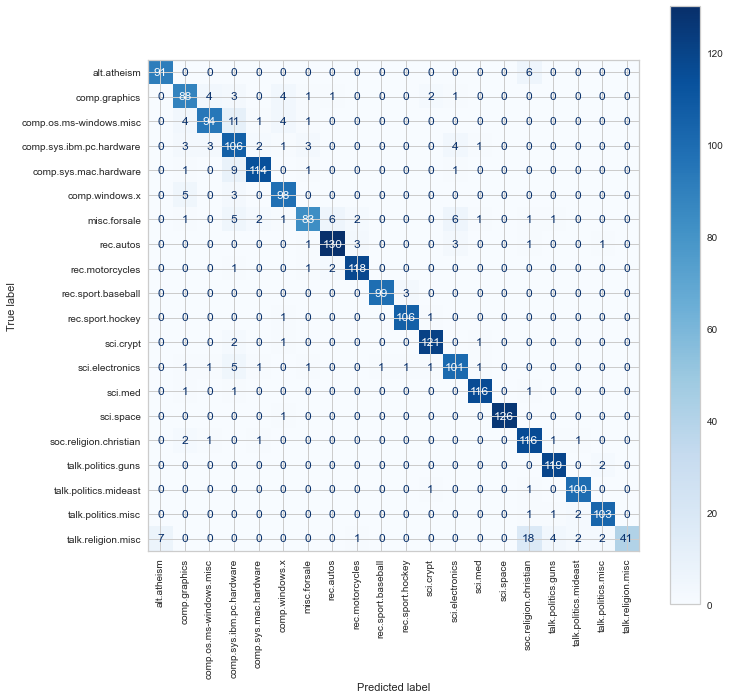

In [46]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(11, 11))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [47]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.94      0.93        97
           comp.graphics       0.83      0.85      0.84       104
 comp.os.ms-windows.misc       0.91      0.82      0.86       115
comp.sys.ibm.pc.hardware       0.73      0.86      0.79       123
   comp.sys.mac.hardware       0.94      0.90      0.92       126
          comp.windows.x       0.88      0.92      0.90       106
            misc.forsale       0.90      0.76      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.95      0.97      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.96      0.97      0.96       125
         sci.electronics       0.87      0.89      0.88       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [48]:
my_sentence = "I think guns are great and not dangerous"

# 1. Apply the text pipeline to your sentence
my_new_sentence = text_processing_pipeline(my_sentence)
print(my_new_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
new_X_vectorized = vectorizer.transform([my_new_sentence])

# 3. Use the model to predict your new `X`. 
new_y_pred = model.predict(new_X_vectorized)

# 4. Print the prediction
print(new_y_pred)

think gun great danger
['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [54]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)



(86460, 3)


In [55]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [58]:
df.isnull().sum().sum()

0

In [59]:
df.duplicated().sum()

57

In [60]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [64]:
df= df.rename(columns=str.lower)
df.head()

,party,handle,tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [66]:
df.party.value_counts()

Republican    44362
Democrat      42041
Name: party, dtype: int64

In [67]:
df['tweet_clean'] = df['tweet'].apply(text_processing_pipeline)

print("ORIGINAL TEXT:", df['tweet'][0])
print("CLEANDED TEXT:", df['tweet_clean'][0])

ORIGINAL TEXT: Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
CLEANDED TEXT: today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [68]:
X = df['tweet_clean'].values

y = df['party'].values

In [69]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [70]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

#from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# 3. Fit your vectorizer using your X data
# This makes your vocab matrix
vectorizer.fit(X_train)

# 4. Transform your X data using your fitted vectorizer. 
# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# 5. Print the shape of your X.  How many features (aka columns) do you have? -> 105630 columns! 
print(X_train.shape, type(X))

(69122, 101702) <class 'numpy.ndarray'>


In [71]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

101702 101702


,feature,idf
50851,httpstcomjulusrbwu,11.450496
54390,httpstcoolqacj0dt2,11.450496
54397,httpstcooltr8qvnz8,11.450496
54396,httpstcooltmasoma4,11.450496
54395,httpstcoolthxcfpo3,11.450496
...,...,...
100882,work,3.973740
95916,thank,3.581094
4622,amp,3.348818
96634,today,3.311055


In [72]:
twitter_model = MultinomialNB(alpha=.05)


In [73]:
twitter_model.fit(X_train, y_train)

MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)

In [74]:
y_pred = twitter_model.predict(X_test)
y_pred

array(['Democrat', 'Democrat', 'Democrat', ..., 'Democrat', 'Democrat',
       'Democrat'], dtype='<U10')

In [76]:
accuracy = twitter_model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.815694


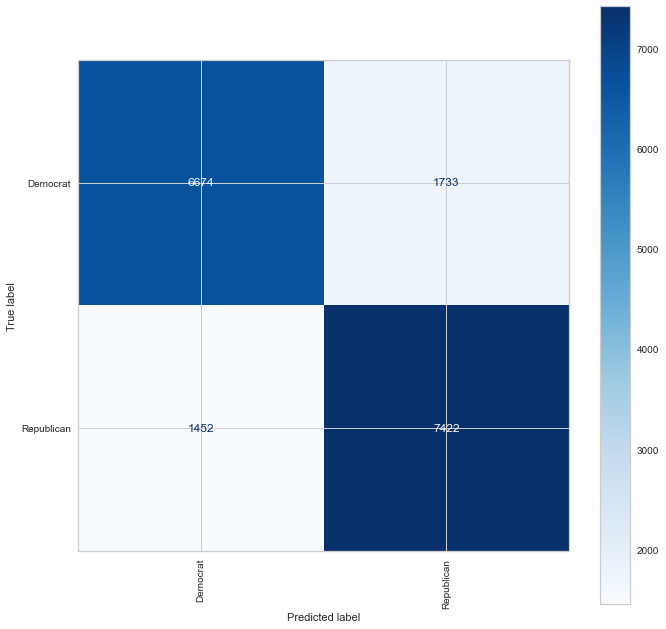

In [82]:
fig, ax = plt.subplots(figsize=(11, 11))

disp = plot_confusion_matrix(twitter_model, X_test, y_test,
                             display_labels=twitter_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [83]:
print(classification_report(y_test, y_pred, target_names=twitter_model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.81      8407
  Republican       0.81      0.84      0.82      8874

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281



In [84]:
#Testing on new tweet:

my_sentence = "I think the dems will win the election"

# 1. Apply the text pipeline to your sentence
my_new_sentence = text_processing_pipeline(my_sentence)
print(my_new_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
new_X_vectorized = vectorizer.transform([my_new_sentence])

# 3. Use the model to predict your new `X`. 
new_y_pred = twitter_model.predict(new_X_vectorized)

# 4. Print the prediction
print(new_y_pred)

think dem win elect
['Democrat']
